In [1]:
# Importamos librerías de análisis de datos
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# Cargamos el dataframe
df = pd.read_csv('train.csv', index_col='id', parse_dates=['fecha'])

In [3]:
# nos quedamos con las columnas que nos interesan
df = df[['tipodepropiedad', 'provincia', 'ciudad', 'metrostotales', 'antiguedad', 'precio', 'fecha']]
df.head()

,tipodepropiedad,provincia,ciudad,metrostotales,antiguedad,precio,fecha
id,,,,,,,
254099,Apartamento,Distrito Federal,Benito Juárez,80.0,NaN,2273000.0,2015-08-23
53461,Casa en condominio,Distrito Federal,La Magdalena Contreras,180.0,10.0,3600000.0,2013-06-28
247984,Casa,Jalisco,Tonalá,166.0,5.0,1200000.0,2015-10-17
209067,Casa,Edo. de México,Zinacantepec,67.0,1.0,650000.0,2012-03-09
185997,Apartamento,Jalisco,Zapopan,95.0,10.0,1150000.0,2016-06-07


In [4]:
df.precio.max()

12525000.0

In [64]:
df_propiedad = df.groupby(['tipodepropiedad']).agg({'precio':'mean'})
df_propiedad = df_propiedad.sort_values(ascending=False, by = ['precio'])
df_propiedad['precio'] = df_propiedad['precio'].round(2)
df_propiedad

,precio
tipodepropiedad,
Edificio,5009499.37
Rancho,4032681.51
Inmuebles productivos urbanos,3743070.11
Nave industrial,3742600.00
Casa uso de suelo,3732469.23
Terreno industrial,3647994.45
Huerta,3543350.00
Quinta Vacacional,3187426.46
Oficina comercial,3148532.75


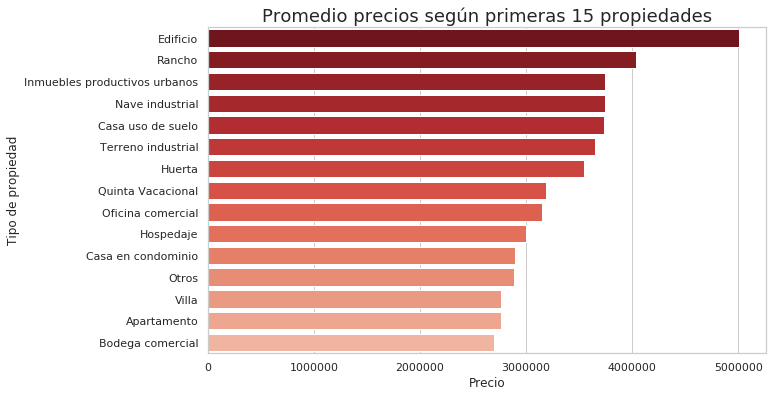

In [66]:
plt.figure(figsize=(10, 6))
g = sns.barplot(y=df_propiedad.reset_index().head(15).tipodepropiedad, x=df_propiedad.reset_index().head(15).precio, palette=sns.color_palette('Reds_r',20))
g.set_title('Promedio precios según primeras 15 propiedades', fontsize=18);
g.set_xlabel('Precio');
g.set_ylabel('Tipo de propiedad');

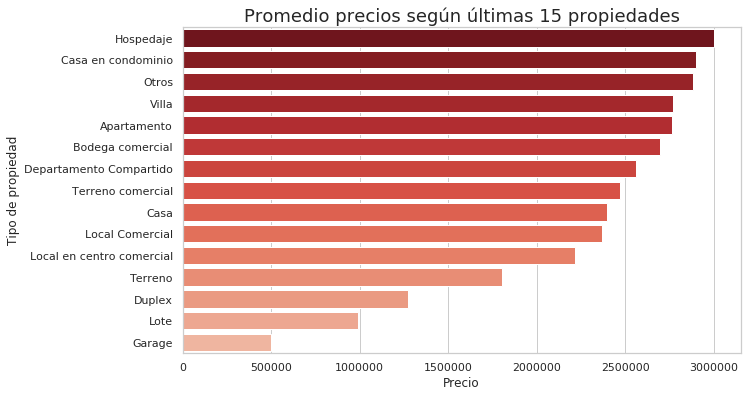

In [67]:
plt.figure(figsize=(10, 6))
g = sns.barplot(y=df_propiedad.reset_index().tail(15).tipodepropiedad, x=df_propiedad.reset_index().tail(15).precio, palette=sns.color_palette('Reds_r',20))
g.set_title('Promedio precios según últimas 15 propiedades', fontsize=18);
g.set_xlabel('Precio');
g.set_ylabel('Tipo de propiedad');

In [9]:
df_provincia = df.groupby(['provincia']).agg({'precio':'mean'})
df_provincia = df_provincia.sort_values(ascending=False, by = ['precio'])
df_provincia = df_provincia.head(15)
df_provincia

,precio
provincia,
Distrito Federal,3.471705e+06
Edo. de México,2.762465e+06
Nuevo León,2.717758e+06
Guerrero,2.548742e+06
Quintana Roo,2.402967e+06
Jalisco,2.367694e+06
Tabasco,2.300480e+06
Puebla,2.298404e+06
Morelos,2.290088e+06


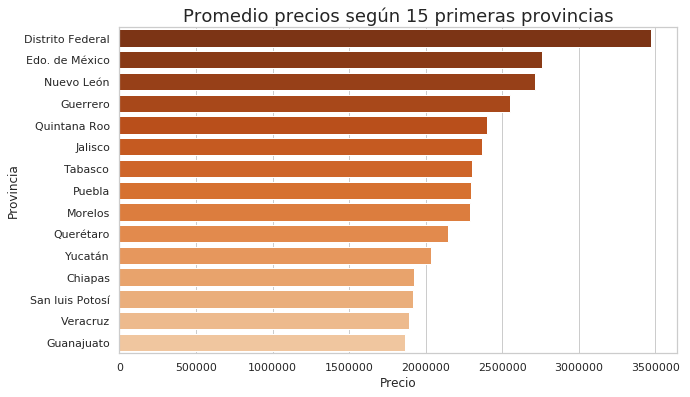

In [10]:
plt.figure(figsize=(10, 6))
g = sns.barplot(y=df_provincia.reset_index().provincia, x=df_provincia.reset_index().precio, palette=sns.color_palette('Oranges_r',20))
g.set_title('Promedio precios según 15 primeras provincias', fontsize=18);
g.set_xlabel('Precio');
g.set_ylabel('Provincia');

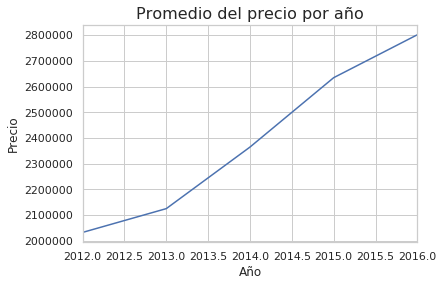

In [14]:
df['año'] = df['fecha'].dt.year
df2=df.groupby(['año']).agg({'precio':'mean'}).reset_index()
df2['precio'] = df2['precio'].round(2)

fig, ax = plt.subplots()
df2.plot.line(x='año', y='precio', ax=ax, legend=False)
ax.set_title('Promedio del precio por año', fontsize=16);
ax.set_xlabel('Año');
ax.set_ylabel('Precio');

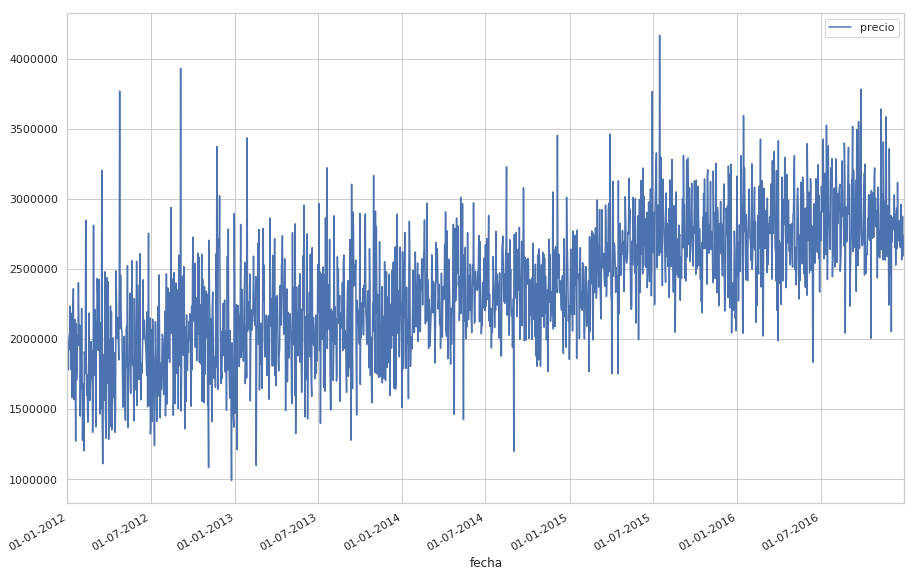

In [16]:
df2=df.groupby(['fecha']).agg({'precio':'mean'})
df2['precio'] = df2['precio'].round(2)

ax = df2.plot(figsize=(15,10))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()

plt.show()

In [19]:
df['mes'] = df['fecha'].dt.month
df['periodo'] = df['mes'].map(str) + '-' + df['año'].map(str)
df['periodo'] = pd.to_datetime(df['periodo'], format='%m-%Y', errors='ignore')

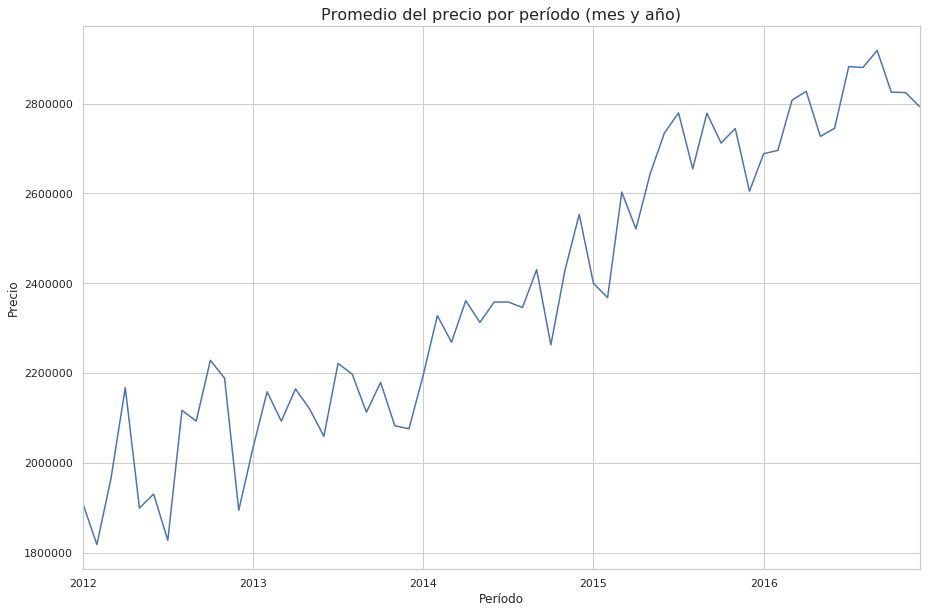

In [52]:
df2=df.groupby(['periodo']).agg({'precio':'mean'})
df2['precio'] = df2['precio'].round(2)

ax = df2.plot(figsize=(15,10), legend=False)
ax.set_title('Promedio del precio por período (mes y año)', fontsize=16);
ax.set_xlabel('Período');
ax.set_ylabel('Precio');
plt.show()

In [53]:
df2.sort_values(by='periodo', ascending=False, inplace=True)
df2['dolar'] = [20.7275,
20.5720,
18.8640,
19.3850,
18.7851,
18.7525,
18.2800,
18.4684,
17.1750,
17.2806,
18.1350,
18.1100,
17.1800,
16.5745,
16.5000,
16.9193,
16.7522,
16.1106,
15.7389,
15.3775,
15.3488,
15.2618,
14.9507,
14.9890,
14.7490,
13.9367,
13.4772,
13.4277,
13.0878,
13.2177,
12.9682,
12.8587,
13.0792,
13.0578,
13.2450,
13.3562,
13.0365,
13.1025,
13.0198,
13.0915,
13.3803,
12.7325,
12.9460,
12.8089,
12.1340,
12.3160,
12.7791,
12.7088,
12.8657,
12.9503,
13.0994,
12.8594,
13.1924,
13.3270,
13.3573,
14.3716,
13.0155,
12.8070,
12.8460,
13.0446]
df2.head()

,precio,dolar
periodo,,
2016-12-01,2792976.58,20.7275
2016-11-01,2824474.06,20.5720
2016-10-01,2825196.14,18.8640
2016-09-01,2918303.51,19.3850
2016-08-01,2880278.12,18.7851


In [57]:
df2.sort_values(by='periodo', inplace=True)
df2['variacion_precio'] = df2['precio'] / df2['precio'].shift(1) -1
df2['variacion_dolar'] = df2['dolar'] / df2['dolar'].shift(1) -1
df2.head()

,precio,dolar,variacion_precio,variacion_dolar
periodo,,,,
2012-01-01,1910287.35,13.0446,NaN,NaN
2012-02-01,1817814.98,12.8460,-0.048408,-0.015225
2012-03-01,1966355.14,12.8070,0.081714,-0.003036
2012-04-01,2167271.07,13.0155,0.102177,0.016280
2012-05-01,1899123.96,14.3716,-0.123726,0.104191


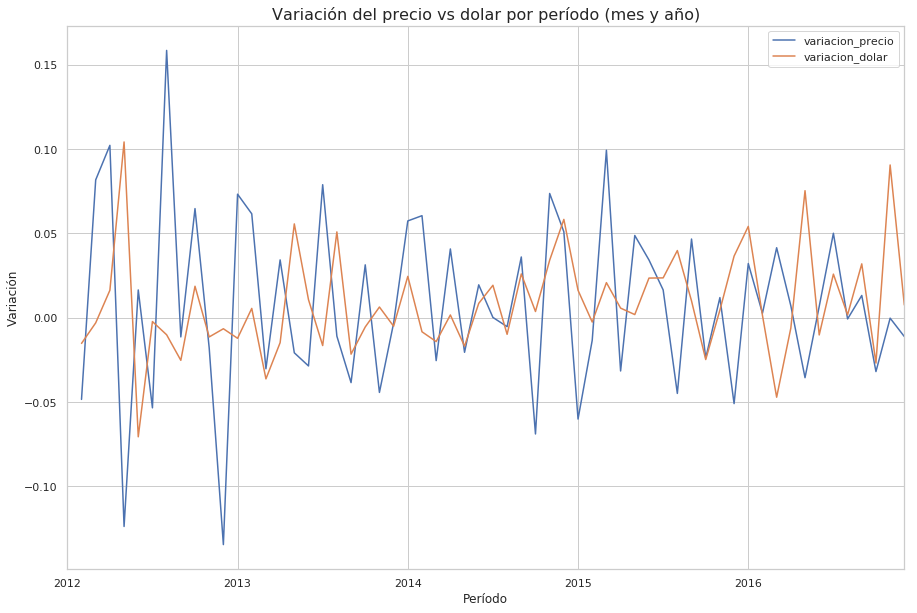

In [61]:
ax = df2[['variacion_precio', 'variacion_dolar']].plot(figsize=(15,10))
ax.set_title('Variación del precio vs dolar por período (mes y año)', fontsize=16);
ax.set_xlabel('Período');
ax.set_ylabel('Variación');
plt.show()